In [44]:
import csv
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Q1 Download the dataset from the following link. It has 5572 messages labeled as spam or ham:
## https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv
## Implement Multinomial Naïve Bayes classifier (in-built) for detection of messages as spam or ham?


In [3]:
with open("sms.tsv") as file:
    tsv_file = csv.reader(file, delimiter="\t")
    target = []
    message = []
    for line in tsv_file:
        target.append(line[0])
        message.append(line[1])

In [4]:
data = pd.DataFrame(data = {'message':message, 'target':target})

In [5]:
data.head()

,message,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


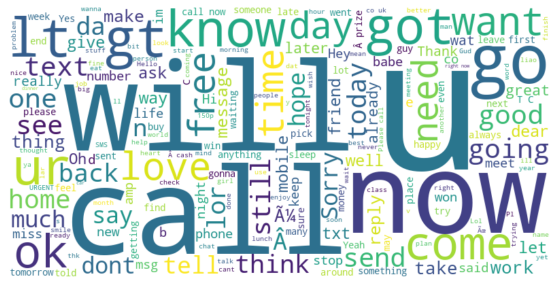

In [6]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(data.message))
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(data.iloc[:,0])

In [8]:
le = LabelEncoder()
le.fit(data['target'])

LabelEncoder()

In [9]:
y = le.transform(data['target'])
y

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [11]:
clf_mul = MultinomialNB()
clf_mul.fit(x_train,y_train)

MultinomialNB()

In [12]:
y_pred = clf_mul.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [13]:
clf_mul.score(x_test, y_test)

0.9798994974874372

## (Gaussian Naïve Bayes Classifier) Implement Gaussian Naïve Bayes Classifier on the Iris dataset from sklearn.datasets using
### (i) Step-by-step implementation
### (ii) In-built function

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets

In [66]:
iris = datasets.load_iris()

In [67]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [68]:
le = LabelEncoder()
target = le.fit_transform(iris['target'])

In [69]:
df = pd.DataFrame(iris['data'])

In [70]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [71]:
df.columns = iris.feature_names

In [72]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], target)

In [74]:
clf = GaussianNB()
clf.fit(x_train, y_train)

GaussianNB()

In [75]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0], dtype=int64)

In [76]:
clf.score(x_test, y_test)

0.9736842105263158

In [77]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [78]:
grid_search.best_params_

{'n_neighbors': 9}

In [83]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test) 

In [84]:
knn.score(x_test, y_test)

0.9736842105263158